# Prepration des librairies, du model et du dataset

In [1]:
import innvestigate
import numpy as np
from keras.models import load_model
!python -c 'import keras; print(keras.__version__)'
model = load_model('model.h5')

Using TensorFlow backend.


Using TensorFlow backend.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/utils/conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/backend/__init__.py", line 89, in <module>
    from .tensorflow_backend import *
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/backend/tensorflow_backend.py", line 5, in <module>
    import tensorflow as tf
ModuleNotFoundError: No module named 'tensorflow'




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.wh

# Lecture du dataset enregistré ( test  et train )

In [2]:
import pickle
train_x = pickle.load(open('train_x.pickle', "rb"))
test_x = pickle.load(open('test_x.pickle', "rb"))
test_y = pickle.load(open('test_y.pickle', "rb"))

# Premier test d'analyse

In [3]:
equivalents = {
"leukemia class: ALL with t(12;21)":0,  # ALL
"leukemia class: c-ALL/Pre-B-ALL with t(9;22)":0, # ALL
"leukemia class: AML with normal karyotype + other abnormalities":1, # AML
"leukemia class: ALL with t(1;19)":0, # ALL
"leukemia class: CLL":2, # CLL
"leukemia class: AML with t(15;17)":1, # AML
"leukemia class: Non-leukemia and healthy bone marrow":5, # Non-Leukemia
"leukemia class: Pro-B-ALL with t(11q23)/MLL":0, # ALL
"leukemia class: ALL with hyperdiploid karyotype":0, # ALL
"leukemia class: T-ALL":0, # ALL
"leukemia class: AML with t(8;21)":1, # AML
"leukemia class: AML with inv(16)/t(16;16)":1, # AML
"leukemia class: MDS":4, # MDS
"leukemia class: mature B-ALL with t(8;14)":0, # ALL
"leukemia class: c-ALL/Pre-B-ALL without t(9;22)":0, # ALL
"leukemia class: AML with t(11q23)/MLL":1, # AML
"leukemia class: CML":3, # CML
"leukemia class: AML complex aberrant karyotype":1, # AML
}


methods = [
    ("gradient"),
    ("smoothgrad"),
    ("deconvnet"),
    ("guided_backprop"),
    ("input_t_gradient"),
    ("integrated_gradients"),
    ("lrp.z"),
    ("lrp.epsilon"),
    ]


analyzers = {}
print(methods)
for method in methods:
  print("Analyzer for Method : "+str(method))
  if method == "deep_lift.wrapper":
    analyzer = innvestigate.create_analyzer(method, model, neuron_selection_mode="index")
    analyzer.fit(train_x, batch_size=256, verbose=1)
    analyzers[method]= analyzer
    
  else:
    analyzer = innvestigate.create_analyzer(method, model)
    analyzer.fit(train_x, batch_size=256, verbose=1)
    analyzers[method]= analyzer

['gradient', 'smoothgrad', 'deconvnet', 'guided_backprop', 'input_t_gradient', 'integrated_gradients', 'lrp.z', 'lrp.epsilon']
Analyzer for Method : gradient
Analyzer for Method : smoothgrad
Analyzer for Method : deconvnet
Analyzer for Method : guided_backprop
Analyzer for Method : input_t_gradient
Analyzer for Method : integrated_gradients
Analyzer for Method : lrp.z
Analyzer for Method : lrp.epsilon


/home/raysamram/py_37_env/lib/python3.7/site-packages/innvestigate/analyzer/base.py:130: RuntimeWarning: This analyzer does not need to be trained. Still fit() is called.
  " Still fit() is called.", RuntimeWarning)


# Etape d'analyse
Déploiement de tous les algorithmes d'interpretation

In [4]:
results = {}

for i in analyzers:
  print("Analyzing with "+str(i))
  results[i] = []
  for j in range(len(test_x)):
    x = np.array([test_x[j]])
    results[i].append(analyzers[i].analyze(x))

Analyzing with gradient
Analyzing with smoothgrad

Analyzing with deconvnet
Analyzing with guided_backprop
Analyzing with input_t_gradient
Analyzing with integrated_gradients
Analyzing with lrp.z
Analyzing with lrp.epsilon


In [5]:
print(results.keys())
for i in results:
  print(str(i)+" : "+str(len(results[i])))
means = {}
import numpy as np
for i in results:
  mat = np.array(results[i])
  mean = mat.mean(0)
  means[i] = mean


dict_keys(['gradient', 'smoothgrad', 'deconvnet', 'guided_backprop', 'input_t_gradient', 'integrated_gradients', 'lrp.z', 'lrp.epsilon'])
gradient : 692
smoothgrad : 692
deconvnet : 692
guided_backprop : 692
input_t_gradient : 692
integrated_gradients : 692
lrp.z : 692
lrp.epsilon : 692


# Heatmap des Pertinences

[[-7.22526181e-08  4.65764560e-06 -2.84004295e-06 ...  5.42967700e-06
   4.93461266e-06  4.48126866e-06]
 [-3.76737148e-08  2.38384337e-06 -1.45429669e-06 ...  2.77973800e-06
   2.52634663e-06  2.29422017e-06]
 [-3.99288609e-07  7.04015292e-07  6.10947723e-07 ...  3.73572647e-07
   1.27464625e-06 -1.19905394e-06]
 ...
 [-1.62546239e-05  1.95303210e-03 -9.32418450e-04 ...  3.22373497e-04
   6.51965442e-04  1.02322476e-04]
 [-1.93580752e-04  9.94458422e-03 -5.20637352e-03 ...  1.76312472e-03
   3.38509446e-03  5.58317639e-04]
 [-1.93581072e-04  9.94458329e-03 -5.20637352e-03 ...  1.76312448e-03
   3.38509423e-03  5.58317639e-04]]
Min : -3.719094
Max : 1.866224
(8, 54630)


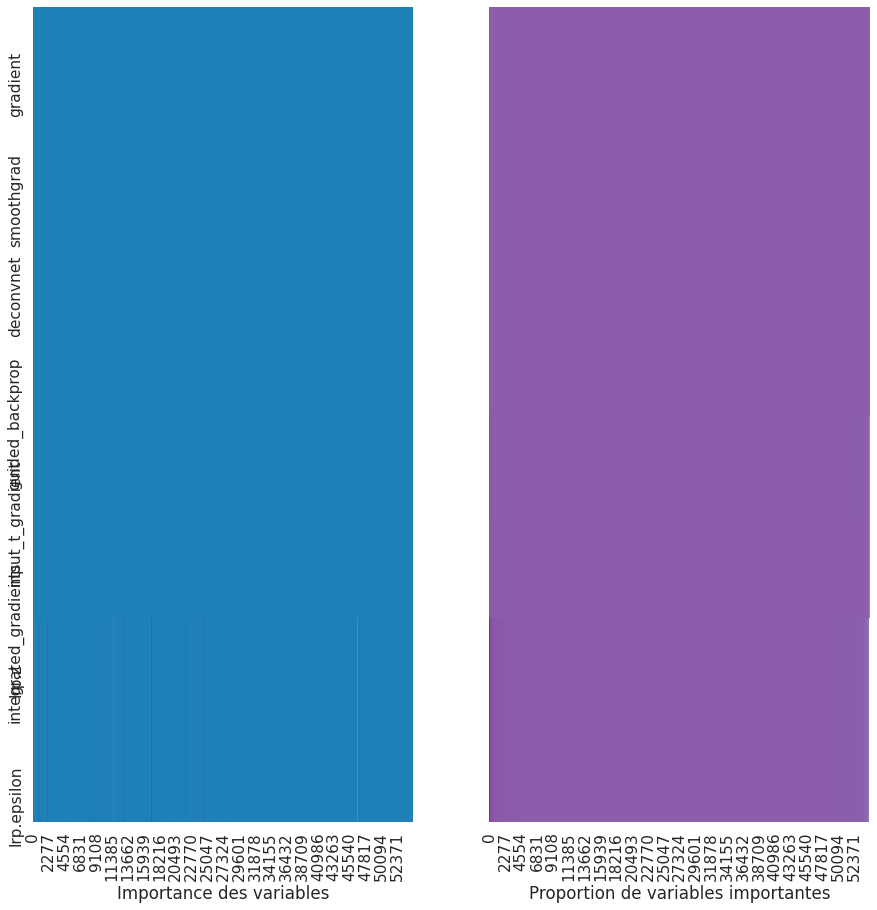

In [6]:
import seaborn as sns; sns.set(font_scale=1.4)
import matplotlib.pyplot as plt

plots = []
sorted_plots = []
inverse_sort = []
for i in means:
  plots.append(means[i][0])
  sorted_plots.append(np.sort(means[i][0])[::-1])
  inverse_sort.append(np.sort(means[i][0]))
  

toplot = np.array(plots)
print(str(toplot))
print("Min : "+str(np.min(toplot)))
print("Max : "+str(np.max(toplot)))
print(toplot.shape)
f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(15)
f.set_figwidth(15)

g1 = sns.heatmap(toplot,cmap="YlGnBu",cbar=False,ax=ax1)
g1.set(yticklabels = methods)
g1.set_ylabel('')
g1.set_xlabel('Importance des variables')

g2 = sns.heatmap(np.array(sorted_plots),cmap="BuPu",cbar=False,ax=ax2)
g2.set(yticklabels = methods)
g2.set_ylabel('')
g2.set_xlabel('Proportion de variables importantes')

plt.yticks(va='center', rotation = 90) 
plt.show()

# Calcul des corrélations et du pairplot

In [7]:
cov_res = np.corrcoef(toplot)

[[Text(0, 0.5, 'gradient'),
  Text(0, 1.5, 'smoothgrad'),
  Text(0, 2.5, 'deconvnet'),
  Text(0, 3.5, 'guided_backprop'),
  Text(0, 4.5, 'input_t_gradient'),
  Text(0, 5.5, 'integrated_gradients'),
  Text(0, 6.5, 'lrp.z'),
  Text(0, 7.5, 'lrp.epsilon')]]

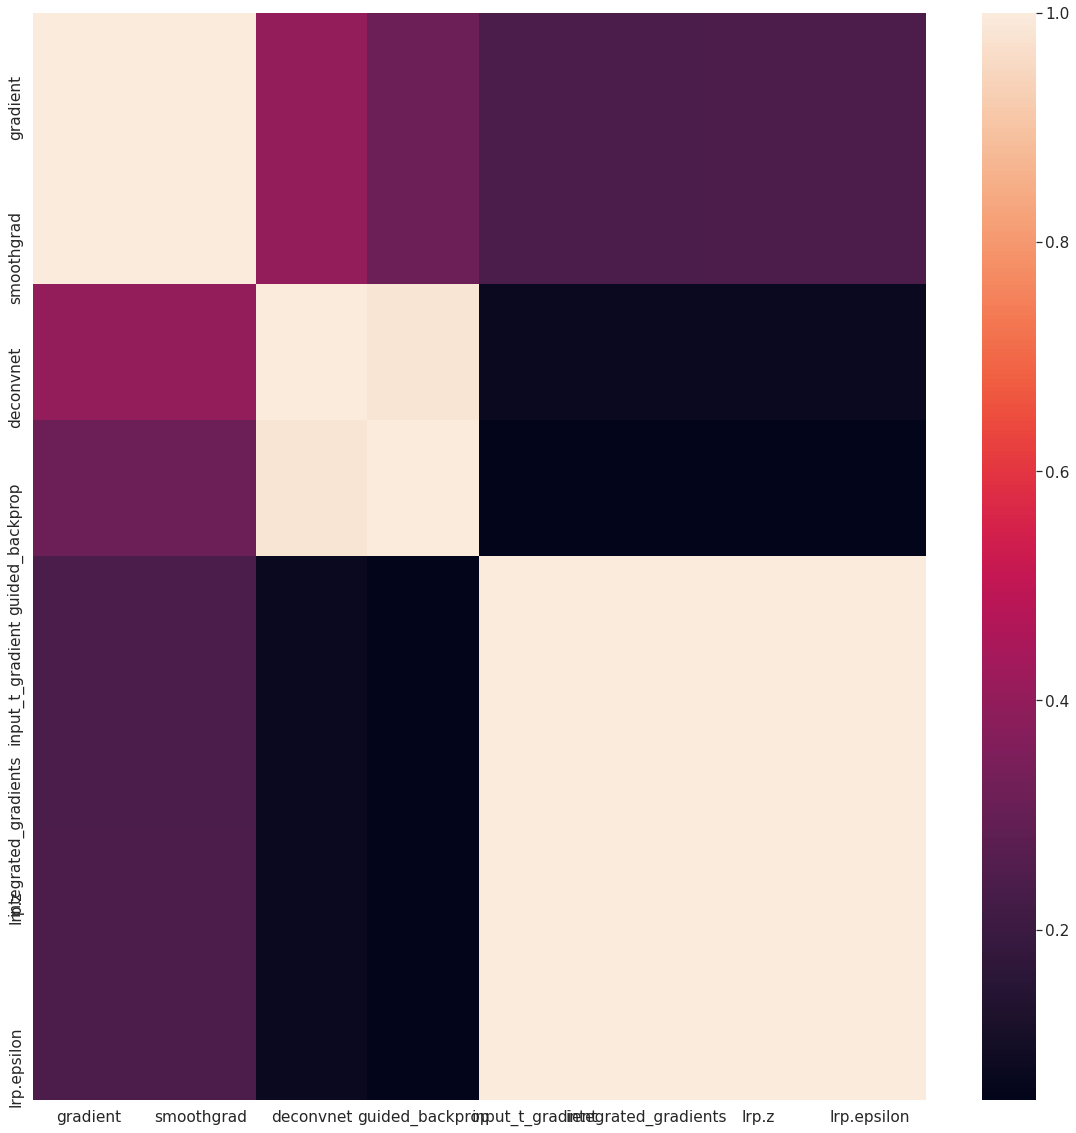

In [8]:
f,ax = plt.subplots(1,sharey=True)
f.set_figheight(20)
f.set_figwidth(20)

g3 = sns.heatmap(cov_res)
g3.set(xticklabels = methods)
g3.set(yticklabels = methods)

54630
{'gradient': array([-7.2252618e-08,  4.6576456e-06, -2.8400430e-06, ...,
        5.4296770e-06,  4.9346127e-06,  4.4812687e-06], dtype=float32), 'smoothgrad': array([-3.7673715e-08,  2.3838434e-06, -1.4542967e-06, ...,
        2.7797380e-06,  2.5263466e-06,  2.2942202e-06], dtype=float32), 'deconvnet': array([-3.9928861e-07,  7.0401529e-07,  6.1094772e-07, ...,
        3.7357265e-07,  1.2746463e-06, -1.1990539e-06], dtype=float32), 'guided_backprop': array([-8.8199528e-07,  1.0464437e-06,  1.6809148e-06, ...,
        1.8534089e-07,  1.7346548e-06, -2.8997297e-06], dtype=float32), 'input_t_gradient': array([-1.7951928e-05,  2.1569366e-03, -1.0297674e-03, ...,
        3.5603100e-04,  7.2003331e-04,  1.1300543e-04], dtype=float32), 'integrated_gradients': array([-1.62546239e-05,  1.95303210e-03, -9.32418450e-04, ...,
        3.22373497e-04,  6.51965442e-04,  1.02322476e-04], dtype=float32), 'lrp.z': array([-0.00019358,  0.00994458, -0.00520637, ...,  0.00176312,
        0.00338509, 

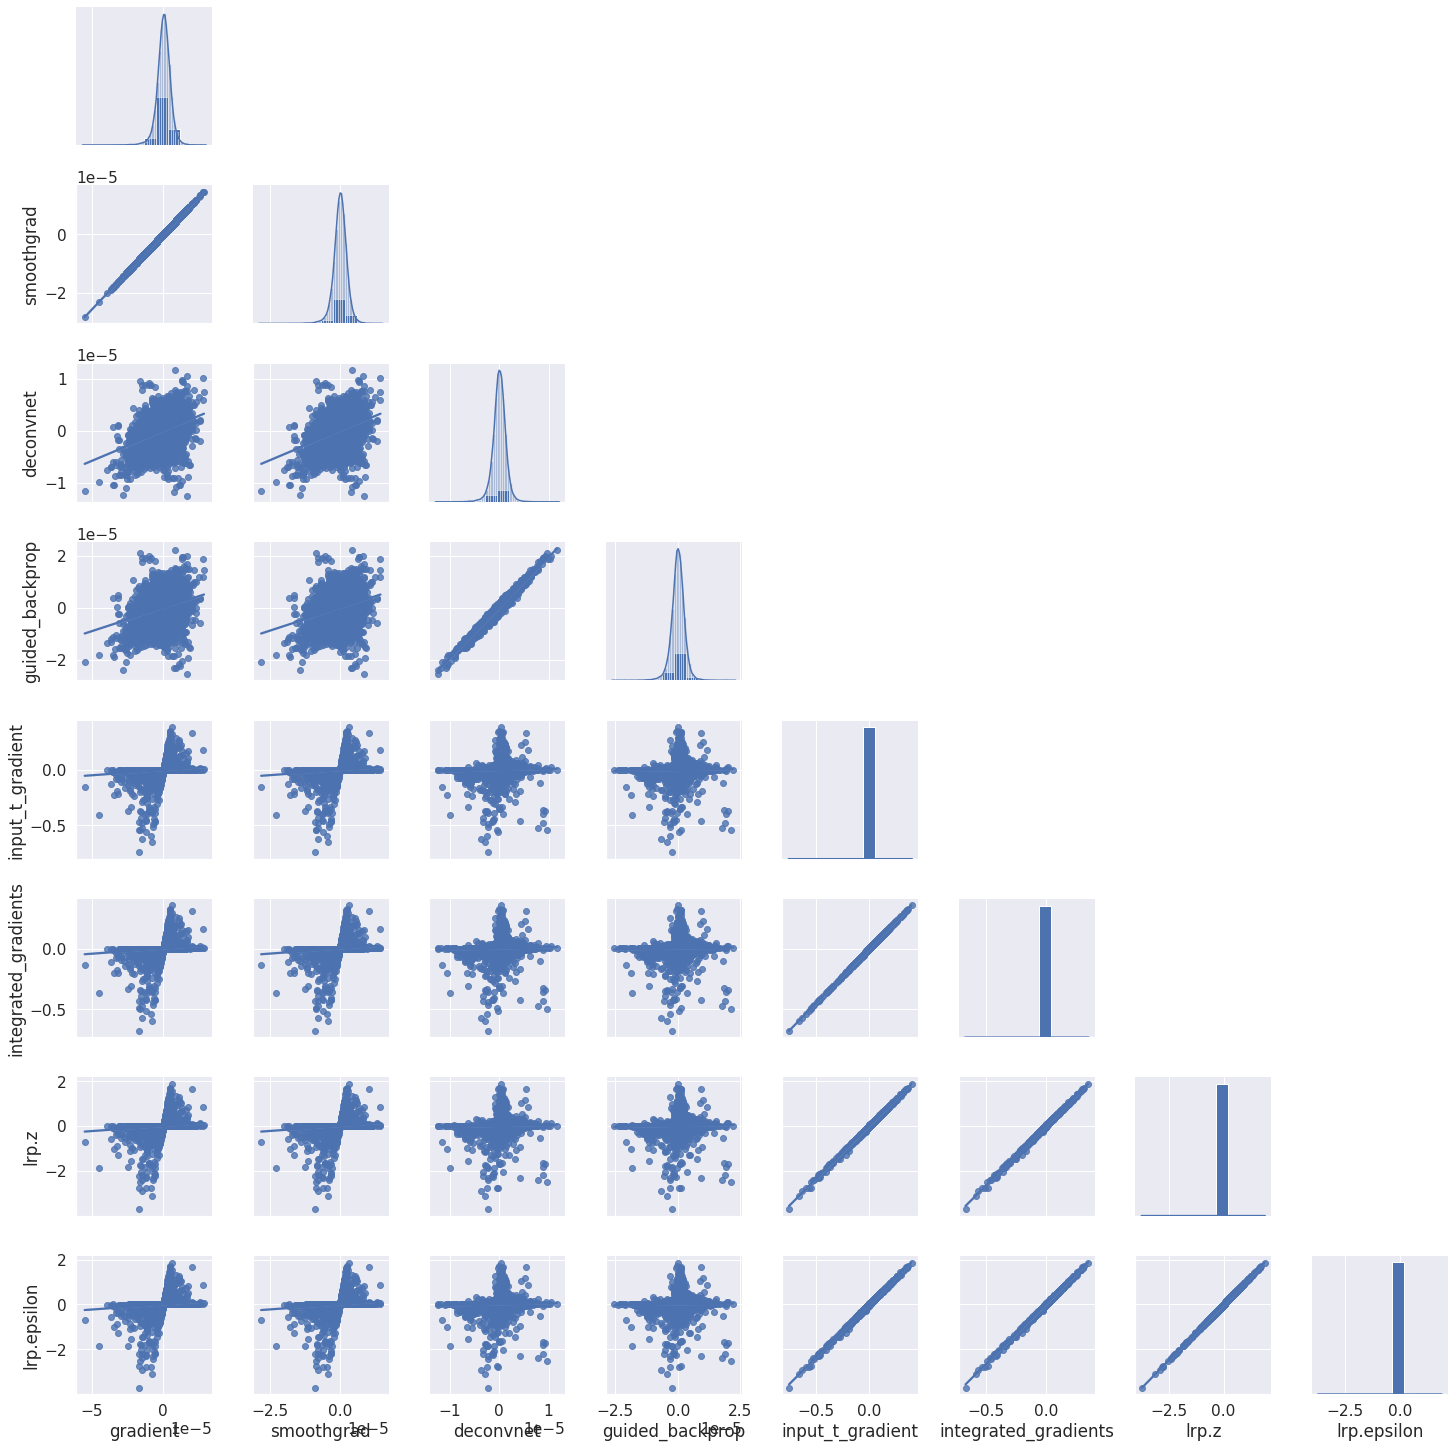

In [9]:
#print(len(cov_res))
#print(len(methods))
dic = {}
print(len(toplot[0]))


for i in range(8):
    dic[methods[i]] = toplot[i]
print(dic)

import pandas as pd
df = pd.DataFrame(dic)
import seaborn as sns
# Create the default pairplot
g = sns.pairplot(df, kind="reg", palette="husl", corner=True)
g.map_diag(sns.distplot)

# Application de la Perturbation

In [ ]:
from sklearn.metrics import precision_score


def perturbation(passes, strategy, analysis, sorted_analysis, model, test_set, test_result, Verbose=True, seuil=None):
    precisions = []
    features_mask = []
    for i in range(passes):
        if seuil is not None and sorted_analysis[i]<seuil:
            print('Limit reached with '+str(i)+'  features.')
            break
        features_mask.append(np.argwhere(analysis==sorted_analysis[i])[0][1])
    if Verbose:
        print("Important features : \n"+str(features_mask))

    y_result = model.predict(test_set)
    y_result = np.argmax(y_result, axis=1)
    test_result = np.argmax(test_result, axis=1)
    initial_precision = precision_score(y_result, test_result, average='macro')
    if Verbose:
        print("Initial precision : "+str(initial_precision))
    precisions.append(initial_precision)
    modified_test_set = []
    nbr_lines = test_set[:, features_mask[0]].shape
    modified_test_set =  test_set.copy()
    if Verbose:
        print("Size of a test element : "+str(test_set[0].shape))
    for k in range(passes):
        set_set = []
        if Verbose:
            print('Treating feature '+str(features_mask[k])+" with "+str(strategy)+" strategy")
            print("Number of already treated features : "+str(len(np.where( modified_test_set[0] == 0))))
        if strategy == "zeros":
            modified_test_set[:, features_mask[k]] = np.zeros((nbr_lines))
        elif strategy == "mean":
            modified_test_set[:, features_mask[k]] = np.mean(modified_test_set[:, features_mask[k]])
        else:
            modified_test_set[:, features_mask[k]] = np.random.choice(modified_test_set[:, features_mask[k]])

        y_new_result = model.predict(modified_test_set)
        y_new_result = np.argmax(y_new_result, axis=1)
        new_precision = precision_score(y_new_result, test_result, average='macro')
        if Verbose:
            print("New precision : "+str(new_precision))
        precisions.append(new_precision)
    return precisions

num_perturbations = 1000



import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,100)
from cycler import cycler
total_count = 0

fig, axes = plt.subplots(8*3, 3, figsize=(20, 150), squeeze=False)
strategies = ['zeros', 'mean', 'random']
fig.tight_layout()

# Need to upscale memory
# su 
# echo 1 > /proc/sys/vm/overcommit_memory

import random
for strategy in strategies:
  count = 0
  for method in means:
    print("Perturbation on "+str(method)+" Analyzer | Perturbation strategy : "+str(strategy))
    print("Highest importance.")
    perturbation_results = perturbation(num_perturbations, strategy, means[method], sorted_plots[count], model, test_x, test_y, Verbose=False)
    axes[(total_count*8)+count, 0].plot(perturbation_results, color='green')
    axes[(total_count*8)+count, 0].set_ylim([0,1])
    axes[(total_count*8)+count, 0].title.set_text(method+" most relevant and strategy "+str(strategy))
    print("Lowest importance.")
    perturbation_results = perturbation(num_perturbations, strategy, means[method], inverse_sort[count], model, test_x, test_y, Verbose=False)
    axes[(total_count*8)+count, 1].plot(perturbation_results, color='red')
    axes[(total_count*8)+count, 1].set_ylim([0,1])
    axes[(total_count*8)+count, 1].title.set_text(method+" less relevant strategy "+str(strategy))
    print("Random importance.")
    rand = sorted_plots[count].copy()
    np.random.shuffle(rand)
    perturbation_results = perturbation(num_perturbations, strategy, means[method], rand, model, test_x, test_y, Verbose=False)
    axes[(total_count*8)+count, 2].plot(perturbation_results, color='blue')
    axes[(total_count*8)+count, 2].set_ylim([0,1])
    axes[(total_count*8)+count, 2].title.set_text(method+" randomly relevant strategy "+str(strategy))
    
    count += 1
  total_count += 1
plt.show()
